<a href="https://colab.research.google.com/github/Shivang-21/NASA-scrapper/blob/master/Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing Libraries & Dataset and viewing Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded=files.upload()
dataset=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
dataset.head()#to view top five rows of a data frame

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Checking Data type, Statistical summmary, shape, null values, etc.

In [ ]:
dataset.info() #To find what all columns it contains, of what types and if they contain any value in it or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Hence from above we get that our data does not contain any null value 

In [ ]:
dataset.shape #to display shape of dataframe

(5000, 14)

In [ ]:
dataset.describe() #to show basic stats of each column

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


From above we get to know about stats of each column in our dataset. This table shows that our Experience column contains some negative values which means our dataset conatins some faulty data.

In [ ]:
#counting number of values less than 0 in Experience column
dataset[dataset['Experience']<0]['Experience'].count()

52

In [ ]:
#replacing all negative values in experience column with median
dataset['Experience']=dataset['Experience'].replace([-3, -2, -1],0)

In [ ]:
#calculating nmber of values less than 0 in column Experience
dataset[dataset['Experience']<0]['Experience'].count()

0

In [ ]:
#again checking the stats of each column
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.440484,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
#ID can be ignored because any ID can be given to any customer
dataset = dataset.drop(columns='ID',axis=1)

In [ ]:
dataset.isnull().sum() #check any null value 

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
#give details about dataset and it will be random sample
dataset.sample(5) 

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3306,47,22,65,90840,1,2.4,1,0,0,0,0,1,0
999,60,35,18,92120,1,1.5,2,0,0,0,0,1,1
560,43,18,59,93943,1,3.7,3,0,0,0,0,1,0
4527,41,16,18,90024,1,0.6,3,0,0,0,0,0,1
1615,62,36,63,93109,1,2.5,3,0,0,0,0,0,0


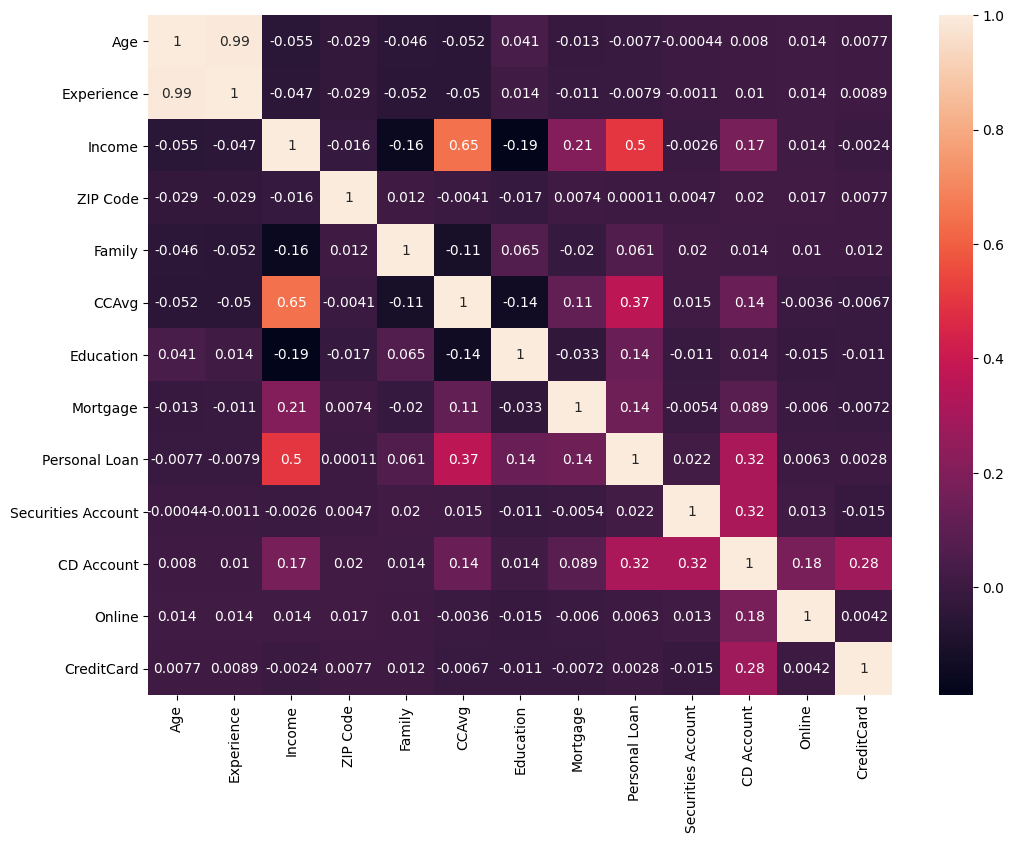

In [ ]:
'''Heatmaps can give a more comprehensive overview of how users are really behaving. Heatmaps are also a lot more
visual than standard analytics reports, which can make them easier to analyse at a glance.'''
 #Compute pairwise correlation of columns, excluding NA/null values.
plt.subplots(figsize =(12,9),dpi=100) 
sns.heatmap(dataset.corr(),annot=True)

In [ ]:
'''As we can see from the above heatmap Experience and Age are highly correalted'''
#finding correlation between Experience and Age
inc=dataset['Experience']
avg=dataset['Age']
co1=inc.corr(avg)
co1

0.9941975435258288

In [ ]:
#We get that  Experince and Age are highly correlated so, we can drop experience column as well
dataset = dataset.drop(columns='Experience',axis=1)

2. EDA: Study of the data distribution in each attribute and target variable, share your findings.

In [ ]:
#to find number of unique in each column
dataset.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [ ]:
#As from above unique value table we can see that there are 467 unique ZIP Code. So dropping ZIP Code as well
dataset.drop('ZIP Code',axis=1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [ ]:
#counting occurences of people with zero Mortgage 
dataset[dataset['Mortgage']==0]['Mortgage'].count()

3462

In [ ]:
#counting occurences with zero Credit Card spending per month 
dataset[dataset['CCAvg']==0]['CCAvg'].count()

106

Univariate, Bivariate and Multivariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f915ac48a20>,
      dtype=object)

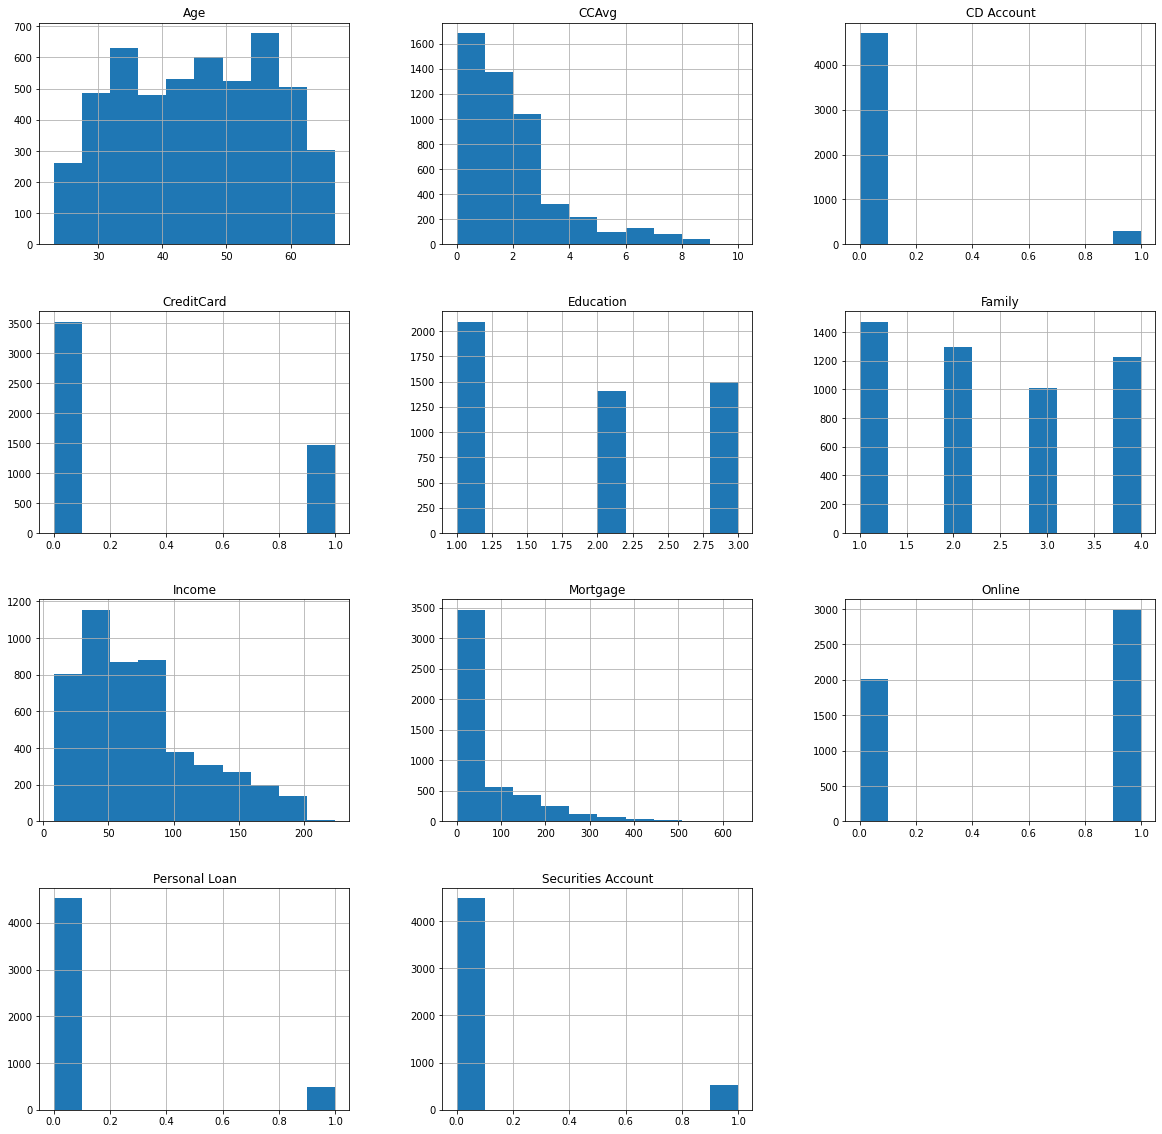

In [ ]:
#Plotting histogram for the required column to get the insight
dataset.hist(column=['Age','Mortgage','CreditCard','Online','Personal Loan','Securities Account','CD Account','Education','Income','CCAvg','Family'],figsize=(20,20))

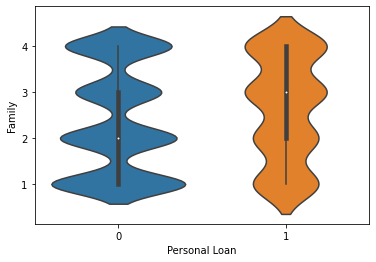

In [ ]:
#Violin Plot is a method to visualize the distribution of numerical data of different variables. 
#It is similar to Box Plot but with a rotated plot on each side, giving more information.
#violinplot Personal Loan and Family
sns.violinplot(x='Personal Loan',y='Family',data=dataset)
plt.show()

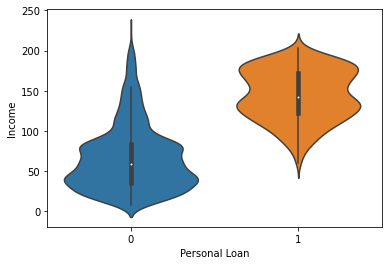

In [ ]:
#violinplot Personal Loan and Income
sns.violinplot(x='Personal Loan',y='Income',data=dataset)
plt.show()
#this shows that customers who took personal loan have higher income than customers who do not take personal loan

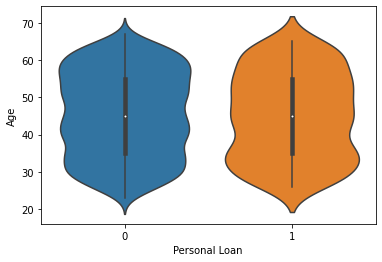

In [ ]:
#vioplot Personal Loan and Age
sns.violinplot(x='Personal Loan',y='Age',data=dataset)
plt.show()

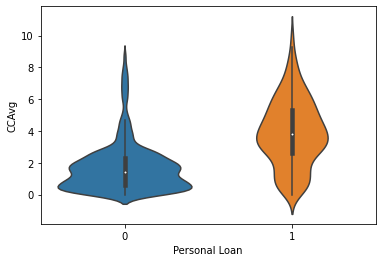

In [ ]:
#vioplot Personal Loan and CCAvg
sns.violinplot(x='Personal Loan',y='CCAvg',data=dataset)
plt.show()
# this shows that CCAvg is high when a customer takes peronal loan

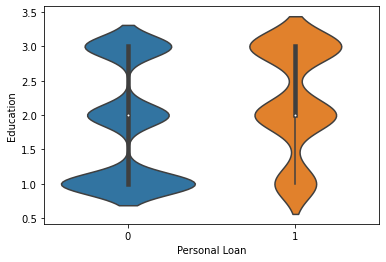

In [ ]:
#vioplot Personal Loan and Education
sns.violinplot(x='Personal Loan',y='Education',data=dataset)
plt.show()

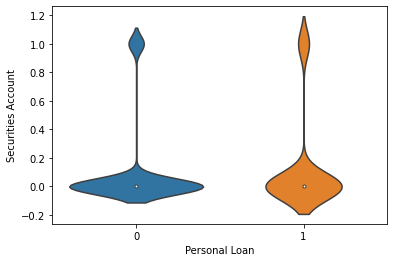

In [ ]:
#vioplot Personal Loan and Securities Account
sns.violinplot(x='Personal Loan',y='Securities Account',data=dataset)
plt.show()

In [ ]:
#Multivariate analysis using seaborn pairplots.It shows a clear and nice view of all variables and 
#their realtion ship with all other variables
sns.set_style("whitegrid")
sns.pairplot(dataset,height=10)

In [ ]:
'''From above analysis we get:
1. Income is skewed
2. CCAvg is also skewed
3. The columns Family and Education are ordinal variables.'''

'From above analysis we get:\n1. Income is skewed\n2. CCAvg is also skewed\n3. The columns Family and Education are ordinal variables.'

In [ ]:
#converting data type of some variables to category type
dataset[['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']]=dataset[['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']].astype('category')

In [ ]:
dataset.dtypes # converted the datatype of the above columns to category type

Age                      int64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [ ]:
#value count of all categorical column
#1.Family
dataset['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
#2.Education
dataset['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
#3.Personal Loan
dataset['Personal Loan'].value_counts()


0    4520
1     480
Name: Personal Loan, dtype: int64

In [ ]:
#we get only few people with high Income take Personal Loan

In [ ]:
#4.Securities Account
dataset['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
#from above we get only few people with securities account

In [ ]:
#5.CD Account
dataset['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
#6.Online
dataset['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [ ]:
#7.CreditCard
dataset['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
#From above we can see that there is a not a balance in the dataset provided in some columns

4.Transformation of feature variables/Normalizing of Data

In [ ]:
#We take Personal Loan because it is our target on which we have to perform our observation
X = dataset.drop('Personal Loan', axis=1)
Y = dataset['Personal Loan']

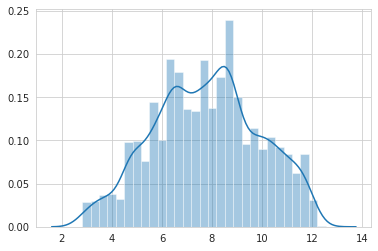

In [ ]:
#Applying necessary transformation for feature varaibles
sc=PowerTransformer(method='box-cox',standardize=False)
sc.fit(X['Income'].values.reshape(-1,1))
t=sc.transform(X['Income'].values.reshape(-1,1))
X['Income']=t
sns.distplot(t)

In [ ]:
#Here we are transforming Mortgage Column by using label encoding
X['Mortgage_int']=pd.cut(X['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
X.drop('Mortgage',axis=1,inplace=True)

In [ ]:
X.head(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_int
0,25,6.994487,91107,4,1.6,1,1,0,0,0,0
1,45,5.974230,90089,3,1.5,1,1,0,0,0,0
2,39,3.402765,94720,1,1.0,1,0,0,0,0,0
3,35,9.309254,94112,1,2.7,2,0,0,0,0,0
4,35,6.747451,91330,4,1.0,2,0,0,0,1,0
5,37,5.561391,92121,4,0.4,2,0,0,1,0,1
6,53,8.186430,91711,2,1.5,2,0,0,1,0,0
7,50,4.886194,93943,1,0.3,3,0,0,0,1,0
8,35,8.577328,90089,3,0.6,2,0,0,1,0,1
9,34,11.591543,93023,1,8.9,3,0,0,0,0,0


5.Splitting Data to train and test

In [ ]:
#stratified sampling is a method of sampling from a population which can be partitioned into subpopulations.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y,random_state=0)

In [ ]:
#Printing x_train, x_test, y_train, y_test
x_train.head(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_int
3789,51,5.093320,94301,3,0.4,1,0,0,1,1,0
758,64,6.051442,90266,1,1.5,2,1,0,0,0,0
2868,52,5.732274,94923,4,1.8,1,0,0,1,1,0
2550,32,4.664963,93106,1,0.5,3,0,0,1,0,1
2150,62,7.283553,91320,1,0.8,1,1,0,0,1,0
1248,44,6.051442,94305,4,0.0,2,0,0,1,0,0
4440,43,8.320470,90041,3,0.3,3,0,0,0,0,0
2318,60,4.991386,94803,1,0.8,2,0,0,1,0,1
43,39,6.747451,95616,1,0.7,1,0,0,1,0,0
3747,26,8.659882,91360,3,3.9,2,0,0,1,0,0


In [ ]:
x_test.head(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_int
9,34,11.591543,93023,1,8.90,3,0,0,0,0,0
461,55,8.577328,92123,2,3.70,1,1,0,0,0,0
3700,48,10.222788,94608,1,5.70,1,1,0,0,0,0
1559,59,9.380256,92677,4,3.00,2,0,0,1,0,1
4558,44,8.618787,95521,2,0.40,1,0,0,1,1,0
4504,27,6.483980,93023,4,1.80,3,0,0,0,0,1
3053,28,9.786365,92521,2,0.20,1,0,0,1,0,0
1358,50,8.659882,92007,1,2.80,2,0,0,1,1,0
2402,48,4.991386,94720,3,0.67,2,0,0,0,0,0
105,24,6.051442,94704,3,0.10,2,1,0,1,0,0


In [ ]:
y_train.head(10)

3789    0
758     0
2868    0
2550    0
2150    0
1248    0
4440    0
2318    0
43      0
3747    1
Name: Personal Loan, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
y_test.head(10)

9       1
461     0
3700    0
1559    1
4558    0
4504    0
3053    0
1358    0
2402    0
105     0
Name: Personal Loan, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
#Printing shape of x_train, x_test, y_train, y_test
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3500, 11), (1500, 11), (3500,), (1500,))

In [ ]:
#Scaling Train and Test data
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Applying Logistic Regression

In [ ]:
logistic=LogisticRegression(random_state=0)
logistic.fit(x_train,y_train)
y_pred=logistic.predict(x_test)

In [ ]:
#cross_val_score returns score of test fold
scores=cross_val_score(logistic,x_train,y_train,cv=10)
scores

array([0.95428571, 0.95714286, 0.93714286, 0.95428571, 0.95428571,
       0.95428571, 0.95714286, 0.95142857, 0.96857143, 0.96      ])

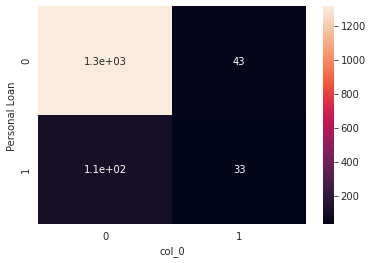

In [ ]:
'''A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a
set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.'''
confusion_matrix=pd.crosstab(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True)

In [ ]:
#storing elements TP, FN, TN, FP of a confusion matrix
TP=confusion_matrix.iloc[1,1]
FN=confusion_matrix.iloc[1,0]
TN=confusion_matrix.iloc[0,0]
FP=confusion_matrix.iloc[0,1]

In [ ]:
#Calculating the Accuracy
accu=((TP+TN)/(TP+FN+TN+FP))*100
print("Accuracy is: ",accu)

Accuracy is:  89.73333333333333


In [ ]:
metrics.accuracy_score(y_test,y_pred)

0.8973333333333333

In [ ]:
'''Calculating Recall
Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total
number of positive examples. High Recall indicates the class is correctly recognized (a small number of FN)'''
recall=(TP/(TP+FN))*100
print("Recall is: ",recall)

Recall is:  22.916666666666664


In [ ]:
'''Calculating Precision
To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples.
High Precision indicates an example labelled as positive is indeed positive (a small number of FP)'''
precision=(TP/(TP+FP))*100
print("Precision is: ",precision)

Precision is:  43.42105263157895


In [ ]:
'''Calculating F-measure
Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses
Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more. The F-Measure will always be nearer to the smaller value of Precision or 
Recall.'''
f_measure=(2*recall*precision)/(recall+precision)
print("F-measure is: ",f_measure)

F-measure is:  29.999999999999996


In [ ]:
#Testing Performance of Logistic Regression
model1=LogisticRegression()
model1.fit(x_train, y_train)
pred_prob1 = model1.predict_proba(x_test)

In [ ]:
'''Plotting ROC curve AUC - ROC curve is a performance measurement for classification problem at various thresholds settings.
ROC (receiver operating characteristic curve) is a probability curve and AUC represents degree or measure of separability.
It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.'''

fpr, tpr, thresh = roc_curve(y_test, pred_prob1[:,1], pos_label=1)


In [ ]:
#Calculating auc score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score1

0.9648527122254998

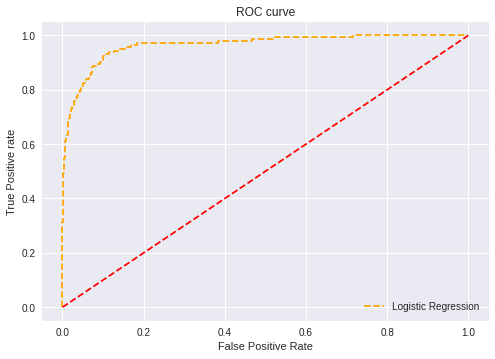

In [ ]:
#Plotting AUC-ROC Curve
plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Applying Random Forest

In [ ]:
#Fitting Random Forest classifier to data set
classifier=RandomForestClassifier(criterion='entropy',max_depth=9)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#cross_val_score returns score of test fold
scores=cross_val_score(classifier,x_train,y_train,cv=10)
scores

array([0.98285714, 0.99714286, 0.98      , 0.98571429, 0.98285714,
       0.97428571, 0.98571429, 0.98571429, 0.98857143, 0.98285714])

In [ ]:
#predicting test set results
y_pred=classifier.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

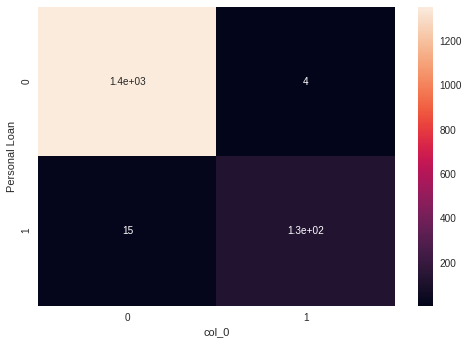

In [ ]:
#Making the confusion matrix
'''A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a
set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.'''
confusion_matrix=pd.crosstab(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True)

In [ ]:
confusion_matrix

col_0,0,1
Personal Loan,,
0,1352,4
1,15,129


In [ ]:
#storing elements TP, FN, TN, FP of a confusion matrix
TP=confusion_matrix.iloc[1,1]
FN=confusion_matrix.iloc[1,0]
TN=confusion_matrix.iloc[0,0]
FP=confusion_matrix.iloc[0,1]

In [ ]:
#Calculating the Accuracy
accu=((TP+TN)/(TP+FN+TN+FP))*100
print("Accuracy is: ",accu)

Accuracy is:  98.73333333333333


In [ ]:
'''Calculating Recall
Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total
number of positive examples. High Recall indicates the class is correctly recognized (a small number of FN)'''
recall=(TP/(TP+FN))*100
print("Recall is: ",recall)

Recall is:  89.58333333333334


In [ ]:
'''Calculating Precision
To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples.
High Precision indicates an example labelled as positive is indeed positive (a small number of FP)'''
precision=(TP/(TP+FP))*100
print("Precision is: ",precision)

Precision is:  96.99248120300751


In [ ]:
'''Calculating F-measure
Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses
Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more. The F-Measure will always be nearer to the smaller value of Precision or 
Recall.'''
f_measure=(2*recall*precision)/(recall+precision)
print("F-measure is: ",f_measure)

F-measure is:  93.14079422382673


In [ ]:
#testing performance of Random Forest 
pred_prob1 = model1.predict_proba(x_test)

In [ ]:
'''Plotting ROC curve AUC - ROC curve is a performance measurement for classification problem at various thresholds settings.
ROC (receiver operating characteristic curve) is a probability curve and AUC represents degree or measure of separability.
It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.'''

fpr, tpr, thresh = roc_curve(y_test, pred_prob1[:,1], pos_label=1)


In [ ]:
#Calculating auc score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score1

0.9648527122254998

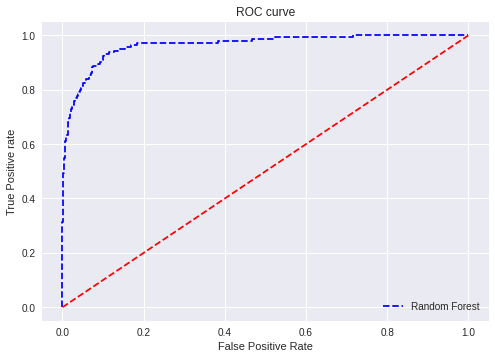

In [ ]:
#Plotting AUC-ROC Curve
plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='--',color='blue', label='Random Forest')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Applying Naive Bayes Model

In [ ]:
#Create a Gaussian Classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = gnb.predict(x_test)

In [ ]:
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 89.60000000000001


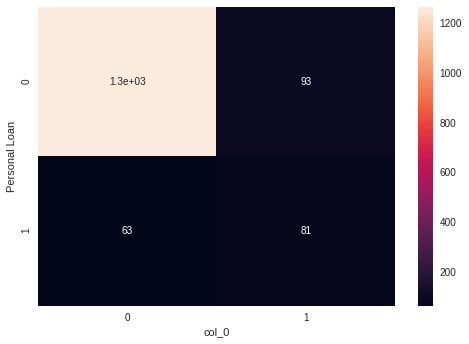

In [ ]:
#Making the confusion matrix
'''A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a
set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.'''
confusion_matrix=pd.crosstab(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True)

In [ ]:
confusion_matrix

col_0,0,1
Personal Loan,,
0,1263,93
1,63,81


In [ ]:
#storing elements TP, FN, TN, FP of a confusion matrix
TP=confusion_matrix.iloc[1,1]
FN=confusion_matrix.iloc[1,0]
TN=confusion_matrix.iloc[0,0]
FP=confusion_matrix.iloc[0,1]

In [ ]:
'''Calculating Recall
Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total
number of positive examples. High Recall indicates the class is correctly recognized (a small number of FN)'''
recall=(TP/(TP+FN))*100
print("Recall is: ",recall)

Recall is:  56.25


In [ ]:
'''Calculating Precision
To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples.
High Precision indicates an example labelled as positive is indeed positive (a small number of FP)'''
precision=(TP/(TP+FP))*100
print("Precision is: ",precision)

Precision is:  46.55172413793103


In [ ]:
'''Calculating F-measure
Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses
Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more. The F-Measure will always be nearer to the smaller value of Precision or 
Recall.'''
f_measure=(2*recall*precision)/(recall+precision)
print("F-measure is: ",f_measure)

F-measure is:  50.94339622641509


In [ ]:
#testing performance of Random Forest 
pred_prob1 = model1.predict_proba(x_test)

In [ ]:
'''Plotting ROC curve AUC - ROC curve is a performance measurement for classification problem at various thresholds settings.
ROC (receiver operating characteristic curve) is a probability curve and AUC represents degree or measure of separability.
It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.'''
fpr, tpr, thresh = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

In [ ]:
#Calculating auc score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score1

0.9648527122254998

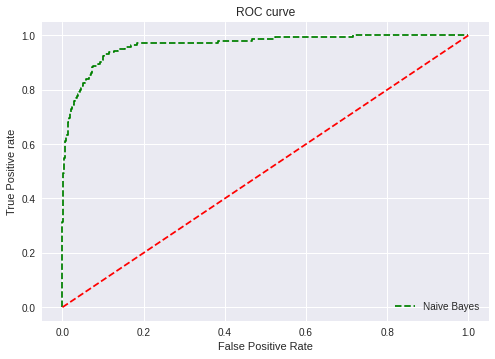

In [ ]:
#Plotting AUC-ROC Curve
plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='--',color='green', label='Naive Bayes')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Applying KNN Algorithm

In [ ]:
#Fitting K-NN classifier to the training set  
classifier= KNeighborsClassifier(n_neighbors=10)  
classifier.fit(x_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)

In [ ]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

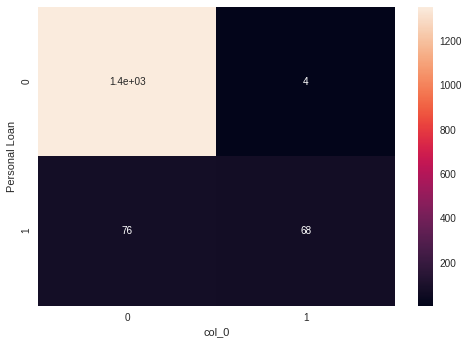

In [ ]:
#Making the confusion matrix
'''A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a
set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.'''
confusion_matrix=pd.crosstab(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True)

In [ ]:
confusion_matrix

col_0,0,1
Personal Loan,,
0,1352,4
1,76,68


In [ ]:
#storing elements TP, FN, TN, FP of a confusion matrix
TP=confusion_matrix.iloc[1,1]
FN=confusion_matrix.iloc[1,0]
TN=confusion_matrix.iloc[0,0]
FP=confusion_matrix.iloc[0,1]

In [ ]:
#Calculating the Accuracy
accu=((TP+TN)/(TP+FN+TN+FP))*100
print("Accuracy is: ",accu)

Accuracy is:  94.66666666666667


In [ ]:
'''Calculating Recall
Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total
number of positive examples. High Recall indicates the class is correctly recognized (a small number of FN)'''
recall=(TP/(TP+FN))*100
print("Recall is: ",recall)

Recall is:  47.22222222222222


In [ ]:
'''Calculating Precision
To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples.
High Precision indicates an example labelled as positive is indeed positive (a small number of FP)'''
precision=(TP/(TP+FP))*100
print("Precision is: ",precision)

Precision is:  94.44444444444444


In [ ]:
'''Calculating F-measure
Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses
Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more. The F-Measure will always be nearer to the smaller value of Precision or 
Recall.'''
f_measure=(2*recall*precision)/(recall+precision)
print("F-measure is: ",f_measure)

F-measure is:  66.36363636363636


In [ ]:
#testing performance of Random Forest 
pred_prob1 = model1.predict_proba(x_test)

In [ ]:
'''Plotting ROC curve AUC - ROC curve is a performance measurement for classification problem at various thresholds settings.
ROC (receiver operating characteristic curve) is a probability curve and AUC represents degree or measure of separability.
It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.'''
fpr, tpr, thresh = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

In [ ]:
#Calculating auc score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score1

0.9567150114716486

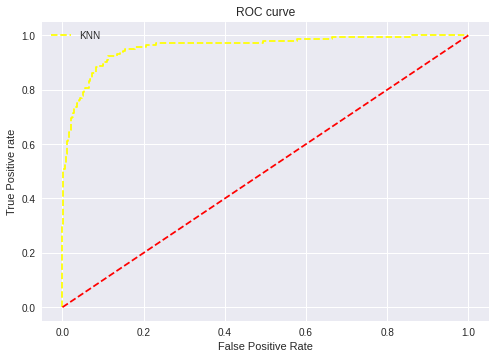

In [ ]:
#Plotting AUC-ROC Curve
plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='--',color='yellow', label='KNN')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();